# Ujian Praktek Data Science

**Zaki Maulana Rabbani**

**Kelas Predict**

Pada program ini digunakan dataset Indeks Pembangunan Manusia (IPM) yang menunjukkan bagaimana index suatu masyarakat berdasarkan harapan lama sekolah, pengeluaran perkapita, rerata lama sekolah, dan usia harapan hidup. Pada model yang saya buat ini bertujuan untuk melakukan model klasifikasi menggunakan teknik ensemble yang terdiri dari bagging, boosting, dan stacking kemudian melihat mana model yang memiliki hasil dan akurasi terbaik untuk dataset IPM yang digunakan.

In [1]:
#deklarasi library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier

In [2]:
#import dataset yg digunakan
df = pd.read_csv('IPM.csv')
df

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal
...,...,...,...,...,...
2191,10.13,5522,4.91,65.32,Low
2192,7.11,5440,2.51,65.26,Low
2193,9.79,4761,2.99,64.83,Low
2194,14.99,14922,11.30,70.15,High


# Explorasi Data

In [3]:
#Memunculkan 5 baris dataset pertama
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [4]:
#Melihat dimensi dari dataset
df.shape

(2196, 5)

In [5]:
#Mengecek dataset yg duplikat
df.duplicated().sum()

0

In [6]:
#Mengecek data yg nol pada tiap kolomnya
df.isnull().sum()

Harapan_Lama_Sekolah     0
Pengeluaran_Perkapita    0
Rerata_Lama_Sekolah      0
Usia_Harapan_Hidup       0
IPM                      0
dtype: int64

In [7]:
#info dari dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [8]:
df.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


**Tranformasi dependent variabel**

In [9]:
data_cat = df[['IPM']]
data_cat

,IPM
0,High
1,Normal
2,Normal
3,Normal
4,Normal
...,...
2191,Low
2192,Low
2193,Low
2194,High


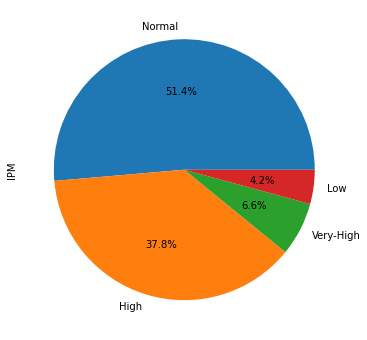

In [10]:
#Penyebaran dependent variable (IPM)
for i in data_cat.columns:
  plt.figure(figsize=(15,6))
  data_cat[i].value_counts().plot(kind='pie',autopct='%1.1f%%')
  plt.xticks(rotation=90)
  plt.show()

In [11]:
for i in data_cat.columns:
  print(data_cat[i].value_counts())

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64


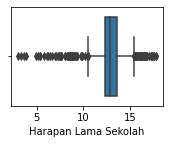

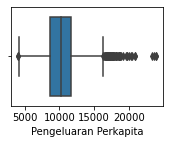

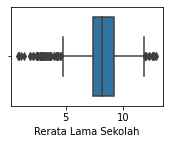

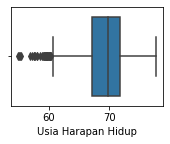

In [12]:
plt.subplot(2, 2, 1)
sns.boxplot(df['Harapan_Lama_Sekolah'])
plt.xlabel("Harapan Lama Sekolah")
plt.show()

plt.subplot(2, 2, 2)
sns.boxplot(df['Pengeluaran_Perkapita'])
plt.xlabel("Pengeluaran Perkapita")
plt.show()

plt.subplot(2, 2, 3)
sns.boxplot(df['Rerata_Lama_Sekolah'])
plt.xlabel("Rerata Lama Sekolah")
plt.show()

plt.subplot(2, 2, 4)
sns.boxplot(df['Usia_Harapan_Hidup'])
plt.xlabel("Usia Harapan Hidup")
plt.show()

<AxesSubplot:xlabel='Harapan_Lama_Sekolah', ylabel='Density'>

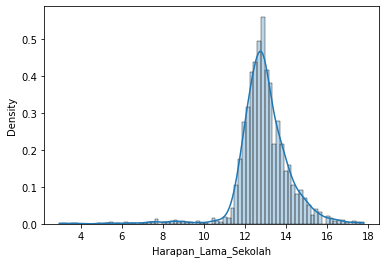

In [13]:
sns.histplot(df['Harapan_Lama_Sekolah'],alpha=0.3,kde=True,stat='density')

<AxesSubplot:xlabel='Pengeluaran_Perkapita', ylabel='Density'>

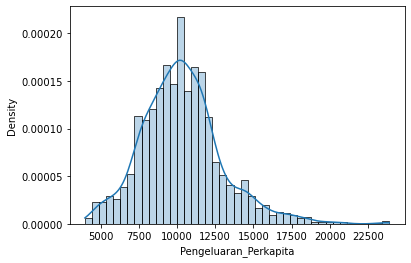

In [14]:
sns.histplot(df['Pengeluaran_Perkapita'],alpha=0.3,kde=True,stat='density')

<AxesSubplot:xlabel='Rerata_Lama_Sekolah', ylabel='Density'>

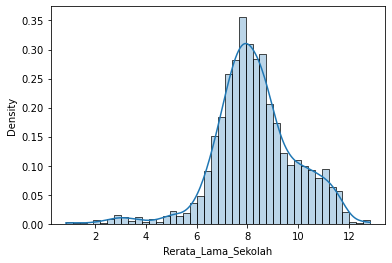

In [15]:
sns.histplot(df['Rerata_Lama_Sekolah'],alpha=0.3,kde=True,stat='density')

<AxesSubplot:xlabel='Usia_Harapan_Hidup', ylabel='Density'>

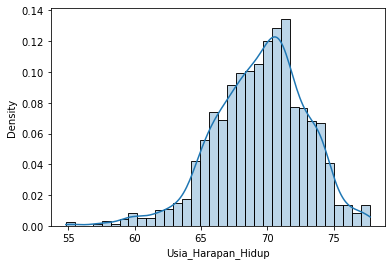

In [16]:
sns.histplot(df['Usia_Harapan_Hidup'],alpha=0.3,kde=True,stat='density')

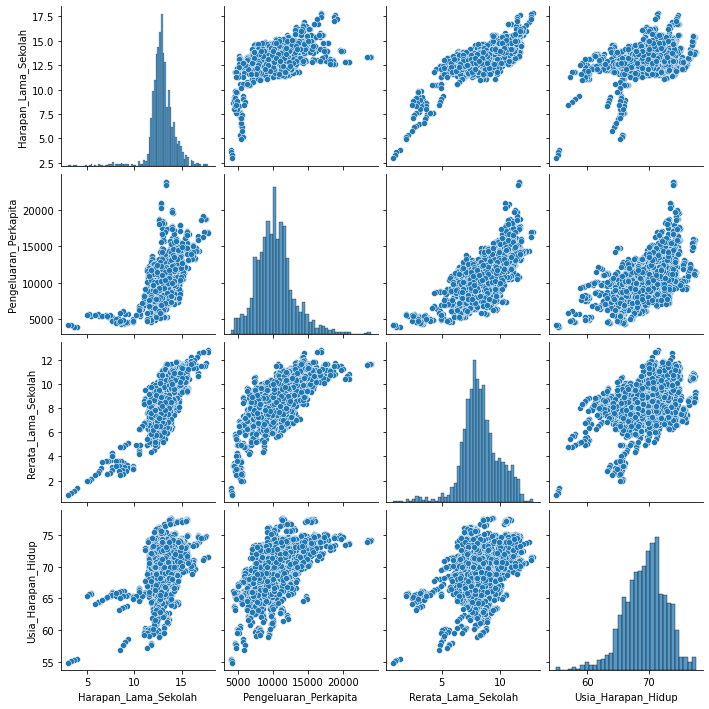

In [17]:
sns.pairplot(df)

In [18]:
#data dependent diubah dalam bentuk numerik
df = df.replace({"IPM":{'Low': 0, 'Normal' : 1, 'High' : 2, 'Very-High' : 3}})
df.sample(10)

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
1788,12.28,7724,7.47,68.53,1
78,13.28,10736,9.19,71.67,2
1482,12.50,8008,7.89,71.90,1
895,15.00,14465,10.17,72.96,2
2178,7.59,4737,4.01,65.52,0
213,12.84,12679,7.66,75.79,2
2079,12.99,10558,7.43,68.74,1
1261,14.09,15838,9.99,72.02,2
82,12.41,11672,8.70,71.24,2
482,12.30,6335,9.69,63.45,1


**Modelling**

In [19]:
#deklarasi variabel dependent dan independent
X = df[['Harapan_Lama_Sekolah', 'Pengeluaran_Perkapita', 'Rerata_Lama_Sekolah', 'Usia_Harapan_Hidup']]
y = df[['IPM']]

In [20]:
#Data displit menjadi training dan testing dengan jumlah testing 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, X_test.shape

((1537, 4), (659, 4))

In [21]:
#Data dilakukan scaling agar meminimalisir outlier
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
y_train

,IPM
1560,1
141,1
1000,1
2,1
576,2
...,...
1638,0
1095,0
1130,1
1294,2


In [23]:
X_train

array([[-0.55055235, -1.04444741, -0.92400057,  0.21650003],
       [-0.25070536, -0.8905865 , -0.33919715, -0.08014344],
       [ 0.67190077, -0.7891439 ,  0.06518819,  0.28405251],
       ...,
       [-0.25070536,  0.25922207,  0.14606526, -0.38559811],
       [ 0.67190077,  0.81168831,  1.67650825,  1.31202494],
       [ 0.14909063, -1.12175497, -1.02976289, -0.68811571]])

In [24]:
X_test

array([[-0.66587812,  0.57825718, -0.92400057,  0.34573085],
       [ 0.51813308, -0.26533802,  0.46957353, -0.57944434],
       [-0.39678467, -0.16125565, -0.43873816, -0.9260179 ],
       ...,
       [ 0.82566846,  2.65160829,  1.47120492,  1.69090621],
       [ 0.54119824,  0.46776393,  0.25182758, -0.39734636],
       [ 0.23366286, -0.49650649, -0.24587746, -0.60294085]])

# Model Random Forest (Bagging)

In [25]:
#training model random forest
classifier_rf = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [26]:
#prediksi dengan model random forest
y_pred = classifier_rf.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[ 27   1   0   0]
 [  0 319   7   0]
 [  0  12 245   3]
 [  0   0   2  43]]


In [28]:
#akurasi dari random forest
print('Training-set accuracy score:', classifier_rf.score(X_train, y_train) *100) #data training
print('Training-set accuracy score:', classifier_rf.score(X_test, y_test) *100) #data testing

Training-set accuracy score: 99.86987638256343
Training-set accuracy score: 96.20637329286798


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.96      0.98      0.97       326
           2       0.96      0.94      0.95       260
           3       0.93      0.96      0.95        45

    accuracy                           0.96       659
   macro avg       0.97      0.96      0.96       659
weighted avg       0.96      0.96      0.96       659



# AdaBoost (Boosting)

In [30]:
#training model AdaBoost
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)

In [31]:
cm2 = confusion_matrix(y_test, y_pred_AB)
print(cm2)

[[ 27   1   0   0]
 [ 20 256  50   0]
 [  0  58 202   0]
 [  0   0  45   0]]


In [32]:
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

           0       0.57      0.96      0.72        28
           1       0.81      0.79      0.80       326
           2       0.68      0.78      0.73       260
           3       0.00      0.00      0.00        45

    accuracy                           0.74       659
   macro avg       0.52      0.63      0.56       659
weighted avg       0.69      0.74      0.71       659



In [33]:
#Akurasi untuk AdaBoost
print('Training-set accuracy score:', ABclassifier.score(X_train, y_train) *100) #data training
print('Training-set accuracy score:', ABclassifier.score(X_test, y_test) *100) #data testing

Training-set accuracy score: 75.53675992192584
Training-set accuracy score: 73.59635811836115


# Balancing (Nyoba HEHE)

In [85]:
from imblearn.over_sampling import SMOTE
# define oversampling strategy
SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)

In [86]:
classifier_rf2 = RandomForestClassifier(n_estimators=10, criterion="entropy")
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [87]:
y_train_SMOTE.sum()/y_train_SMOTE.count()

IPM    1.5
dtype: float64

In [88]:
y_pred2 = classifier_rf2.predict(X_test)

In [89]:
cm = confusion_matrix(y_test, y_pred2)
cm

array([[ 27,   1,   0,   0],
       [  1, 318,   7,   0],
       [  0,   7, 247,   6],
       [  0,   0,   1,  44]], dtype=int64)

In [90]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Training-set accuracy score:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE) *100)
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Training-set accuracy score:', classifier_rf2.score(X_test, y_test) *100)

Training-set accuracy score: 99.93765586034912
Training-set accuracy score: 96.50986342943855


In [91]:
ABclassifier = AdaBoostClassifier(n_estimators=100)

ABclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [92]:
print('Training-set accuracy score:', ABclassifier.score(X_train_SMOTE, y_train_SMOTE) *100)
print('Training-set accuracy score:', ABclassifier.score(X_test, y_test) *100)

Training-set accuracy score: 39.619700748129674
Training-set accuracy score: 11.229135053110774


# Model Stacking 

In [34]:
#Digunakan dua model weak learner KNN dan Naive Bayes
KNN = KNeighborsClassifier() 
NB = GaussianNB()    

In [35]:
model_kNeighborsClassifier = KNN.fit(X_train, y_train) # fitting Training Set
pred_knn = model_kNeighborsClassifier.predict(X_test) # Predicting on test dataset

In [37]:
#Akurasi untuk KNN
acc_knn = accuracy_score(y_test, pred_knn) # evaluating accuracy score
print('accuracy score of KNeighbors Classifier is:', acc_knn * 100)

accuracy score of KNeighbors Classifier is: 95.90288315629742


In [38]:
model_NaiveBayes = NB.fit(X_train, y_train)
pred_nb = model_NaiveBayes.predict(X_test)

In [39]:
#Akurasi untuk Naive Bayes
acc_nb = accuracy_score(y_test, pred_nb)
print('Accuracy of Naive Bayes Classifier:', acc_nb * 100)

Accuracy of Naive Bayes Classifier: 93.32321699544764


In [40]:
#logistic regresi sebagai meta-classifier
lr = LogisticRegression() 
clf_stack = StackingClassifier(classifiers =[KNN, NB], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [41]:
#training dan prediksi untuk model stacking
model_stack = clf_stack.fit(X_train, y_train) 
pred_stack = model_stack.predict(X_test) 

In [42]:
cm3 = confusion_matrix(y_test, pred_stack)
print(cm3)

[[ 27   1   0   0]
 [  0 318   8   0]
 [  0   5 249   6]
 [  0   0   0  45]]


In [43]:
print(classification_report(y_test, pred_stack))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.98      0.98      0.98       326
           2       0.97      0.96      0.96       260
           3       0.88      1.00      0.94        45

    accuracy                           0.97       659
   macro avg       0.96      0.97      0.97       659
weighted avg       0.97      0.97      0.97       659



In [44]:
#Akurasi model
acc_stack = accuracy_score(y_test, pred_stack) 
print('Training-set accuracy score:', clf_stack.score(X_train, y_train) *100) #data training
print('Training-set accuracy score:', clf_stack.score(X_test, y_test) *100) #data testing

Training-set accuracy score: 97.91802212101497
Training-set accuracy score: 96.96509863429439
